<a href="https://colab.research.google.com/github/rauman43/Zomato-Restaurant-Clustering/blob/main/Copy_of_Zomato_Restaurant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Deepinder Goyal and Pankaj Chaddah created Zomato, an Indian restaurant aggregation and food delivery startup, in 2008. Zomato's restaurant data is analysed for customer sentiment and business expansion in this initiative. It covers important business cases and extracts actionable insights through restaurant segmentation and sentiment analysis. Through the use of metadata and customer reviews, the project seeks to improve eating experiences and pinpoint areas that require improvement. Understanding consumer preferences and grouping restaurants for strategic decision-making are made easier with the help of visualisations. In the end, the initiative helps the varied Indian food business both in terms of customer satisfaction and company development.

# **GitHub Link -**

https://github.com/rauman43/Zomato-Restaurant-Clustering

# **Problem Statement**


Effectively analysing Zomato's restaurant data to comprehend consumer feelings, categorise establishments, and handle business situations is a difficulty. This means taking review data and turning them into useful insights, grouping eateries for tactical planning, and improving service standards all around. In the evolving landscape of the Indian food sector, the objective is to support businesses' growth and enable consumers to make well-informed decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import silhouette_samples, silhouette_score
pd.set_option('display.max_columns', None)

#Anamoly detection Tools
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
# Load Dataset
meta_df_1=pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')
meta_df_1



,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [3]:
review_df_2=pd.read_csv('/content/Zomato Restaurant reviews.csv')
review_df_2

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


### Dataset First View

In [ ]:
# Dataset First Look
meta_df_1.head()




,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
review_df_2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
meta_df_1.tail()



,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [ ]:
review_df_2.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("The number of  Rows and Columns in the  Restaurant Dataset",meta_df_1.shape)

In [ ]:
review_df_2.shape
print("The number of Rows and Columns in the Review Dataset",review_df_2.shape)

### Dataset Information

In [ ]:
# Dataset Info
meta_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
review_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("The total number of duplicate items in present in Restaurant dataset =",meta_df_1.duplicated().sum())

The total number of duplicate items in present in Restaurant dataset = 0


In [ ]:
print("The total number of duplicate items present in the Review dataset =",review_df_2.duplicated().sum())

The total number of duplicate items present in the Review dataset = 36


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print('---Null values  present in the Restaurant dataset---','\n',meta_df_1.isnull().sum().sort_values(ascending=False))

In [ ]:

print('----Null values in the Reviews dataset---','\n',review_df_2.isnull().sum().sort_values(ascending=False))

In our dataset there 0 duplicate values found

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(16,5))
sns.heatmap(meta_df_1.isnull(), cmap='plasma', annot=False)
plt.title("All the  Missing values in meta  columns")

plt.show()

In [ ]:
# Visualizing Missing Values in Reviews columns
plt.figure(figsize=(5,5))
sns.heatmap(review_df_2.isnull(), cbar=True, yticklabels=True)
plt.xlabel('Name of columns' ,size =15, weight='bold')
plt.title('All the Missing values present in Review Columns')

### What did you know about your dataset?


There are two data sets provided for the analysis. one is based on the information about the various restaurants that uses the Zomato delivery services, the file named as meta data. Another one is based on the reviews given by the customers to those perticular restaurants that are mentioned in the meta data. Meta file has the dimension as 105 rows and 6 columns as variables and the review file has the dimension of 10000 rows and 7 columns. Also there 36 duplicate values in the review file but there are no duplicate values in the meta file. In addition to that there are also missing values in both the dataset.

## ***2. Understanding Your Variables***

In [ ]:
print("The columns present in the Restaurant dataset:\n", meta_df_1.columns)

The columns present in the Restaurant dataset:
 Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


In [ ]:
print("The columns in the Reviews dataset:\n",review_df_2.columns)

The columns in the Reviews dataset:
 Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [ ]:
meta_df_1.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
# Dataset Describe
meta_df_1.describe(include='all').T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [ ]:
review_df_2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


### Variables Description

# **Zomato Meta Data**

Name: Name of the restaurants

Links : URL links of the restaurants.

Cost:  Per person estimated Cost of dining.

Collection: Tagging of restaurants w.r.t Zomato categories.

Cuisiness: Cuisiness served by the restaurants.

Timings: Restaurant timing.

# **# Zomato Restaurant Reviews**

Restaurant: Name of the restaurants.

Reviewer: Name of the reviewers.

Review: Review text.

MetaData: Reviewer metadata- No. of Reviews and followers.

Time: Date and Time of the review.

Pictures: No.of pictures posted by review.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for item in meta_df_1.columns.tolist():
  print('The number of unique values in column', item, 'is:',  meta_df_1[item].nunique())

The number of unique values in column Name is: 105
The number of unique values in column Links is: 105
The number of unique values in column Cost is: 29
The number of unique values in column Collections is: 42
The number of unique values in column Cuisines is: 92
The number of unique values in column Timings is: 77


In [ ]:
for items in review_df_2.columns.tolist():
  print('The number of unique values in column', items, 'is:')
  print(review_df_2[items].unique())

The number of unique values in column Restaurant is:
['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm N

## 3. ***Data Wrangling***

### Data Wrangling Code

In [4]:

meta_df_1['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [6]:

# Remove the ',' from the cost varible
meta_df_1['Cost']= meta_df_1['Cost'].str.replace(',','').astype('int64')

In [7]:
# Top 5 costly restaurant
meta_df_1.sort_values('Cost')[['Name','Cost']].tail()[::-1]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [8]:
# Top 5 cheap Restaurants
meta_df_1.sort_values('Cost')[['Name','Cost']].head()[::-1]

,Name,Cost
59,KS Bakers,200
101,Sweet Basket,200
54,Asian Meal Box,200
23,Amul,150
89,Mohammedia Shawarma,150


In [14]:

# spliting the Collection and storing in list
Collections_list = meta_df_1.Collections.dropna().str.split(', ')

In [15]:
# storing all the cusines in a dict
Collections_dict = {}
for collection in Collections_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:
            Collections_dict[col_name]=1

In [16]:
 # converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Tags',0:'Number_of_Restaurants'})


In [17]:

#top 10 collection
Collections_df.sort_values('Number_of_Restaurants', ascending =False)[:10]

,Tags,Number_of_Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6
3,Top-Rated,5
4,Gold Curated,5
10,Trending This Week,5
9,Sunday Brunches,4
13,Veggie Friendly,4


# WRANGLING ON CUISINE

In [21]:

# store type of food in a a list with spliting all the food
cuisine_list =meta_df_1.Cuisines.str.split(', ')

In [22]:

# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1

In [23]:
# converting the dict to a data frame
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Type_of_Food',0:'Number_of_Restaurants'})


In [24]:
#top 10 cuisine
cusine_of_the_data=cuisine_df.sort_values('Number_of_Restaurants', ascending =False)
cusine_of_the_data[:10]

,Type_of_Food,Number_of_Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,9
29,Bakery,7


# Review :
Wrangling on Rating variable/Feature

In [26]:
review_df_2['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [28]:
# convert Like into nan and type  of data
review_df_2.loc[review_df_2['Rating']=='Like']=np.nan
review_df_2['Rating']= review_df_2['Rating'].astype('float')

In [29]:
# Filling Null values by mean
review_df_2['Rating'].fillna(3.5, inplace=True)
review_df_2['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

In [55]:
# Split the Time columns into Year Month and Hours
review_df_2['Year'] = pd.DatetimeIndex(review_df_2['Time']).year
review_df_2['Month'] = pd.DatetimeIndex(review_df_2['Time']).month
review_df_2['Hour'] = pd.DatetimeIndex(review_df_2['Time']).hour
review_df_2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,2019.0,5.0,21.0


In [31]:
# code to find top reviewer
reviewer_list = review_df_2.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_10_reviewers = reviewer_list[:10]
top_10_reviewers

,Reviewer,Review_Count
655,Ankita,13
3858,Parijat Ray,13
2654,Kiran,12
2313,Jay Mehta,11
7013,Vedant Killa,11
5958,Siva Kumar,10
4259,Priyanka,10
6130,Sravani,10
3134,Manojkumar D Nambisan,10
265,Age Of Foodies (Suraj Karambe),10


In [32]:
review_df_2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,2019.0,5.0,21.0


In [33]:
#Average engagement of restaurants
avg_hotel_rating = review_df_2.groupby('Restaurant').agg({'Rating':'mean','Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating


,Restaurant,Rating,Total_Review
0,10 Downing Street,3.80,100
1,13 Dhaba,3.48,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
3,AB's - Absolute Barbecues,4.88,100
4,Absolute Sizzlers,3.62,100
...,...,...,...
95,Urban Asia - Kitchen & Bar,3.65,100
96,Yum Yum Tree - The Arabian Food Court,3.56,100
97,Zega - Sheraton Hyderabad Hotel,4.45,100
98,Zing's Northeast Kitchen,3.65,100


In [ ]:
# Write your code to make your dataset analysis ready.
def remove_outlier(df,column):
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.title('Before removing outliers')
  sns.boxplot(df[column])
  plt.subplot(1,2,1)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean())  / df[column]  .std().__abs__() < 3)]
  df = df[((df[column] - df[column].mean()) / df[column].std().__abs__() > -3)]


  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.title('After removing outliers')
  sns.boxplot(df[column])
  plt.subplot(1,2,2)
  sns.histplot(df[column])

In [ ]:
# Handling̣ the missing values in meta data
meta_df_1['Cost'] = meta_df_1['Cost'].astype(str)
meta_df_1['Cost'] = meta_df_1['Cost'].str.replace(',','').astype(float)
meta_df_1.drop(['Links', 'Timings'],axis=1)
meta_df_1.rename(columns={'Name' : 'Restaurant'})
meta_df_1['Collections'].fillna('Unknown')


0      Food Hygiene Rated Restaurants in Hyderabad, C...
1                                    Hyderabad's Hottest
2                     Great Buffets, Hyderabad's Hottest
3                                 Late Night Restaurants
4      Best Bars & Pubs, Food Hygiene Rated Restauran...
                             ...                        
100                                              Unknown
101                                              Unknown
102                                              Unknown
103                                              Unknown
104                                 Pan-Asian Delicacies
Name: Collections, Length: 105, dtype: object

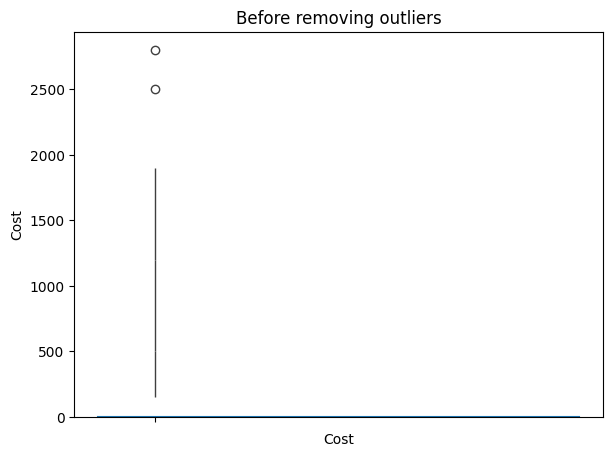

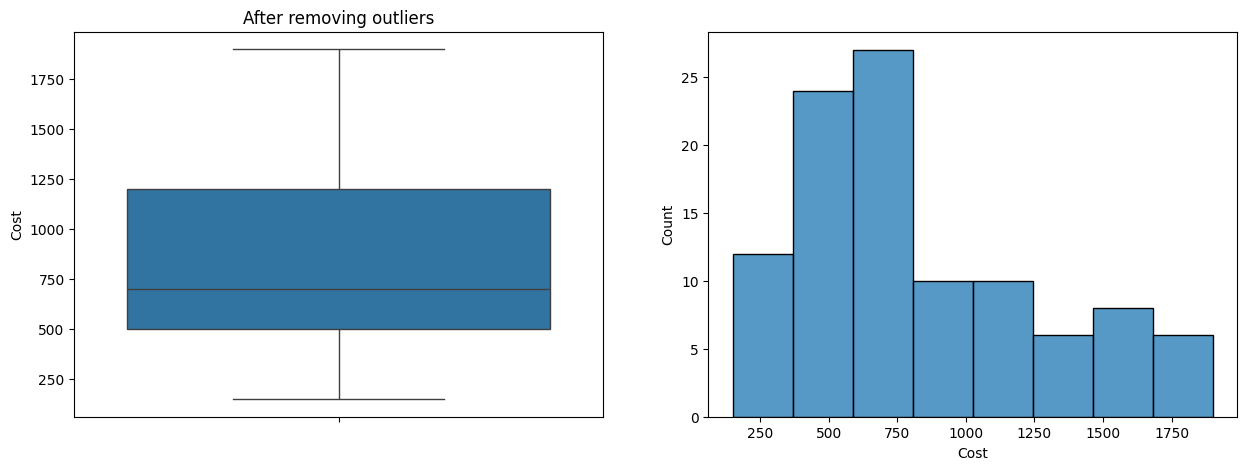

In [ ]:
remove_outlier(meta_df_1,'Cost')

In [ ]:

# Find out the  top 10 costly resturent
Top_10_Expensive_Restaurant=meta_df_1.sort_values('Cost', ascending=False)[['Name', 'Cost']][:10]
Top_10_Expensive_Restaurant

,Name,Cost
33,Club Rogue,900
45,Owm Nom Nom,900
30,Pot Pourri,900
63,Dine O China,850
0,Beyond Flavours,800
1,Paradise,800
50,Gal Punjab Di,800
47,Shanghai Chef 2,800
3,Shah Ghouse Hotel & Restaurant,800
12,Absolute Sizzlers,750


In [10]:
meta_df_1 = meta_df_1.rename(columns = {'Name':'Restaurant'})
merged_df = pd.merge(meta_df_1,review_df_2, on='Restaurant')

In [11]:
merged_df

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


### What all manipulations have you done and insights you found?

1.Removing the Outliers.

2.Drop the unneccessary columns as Links and Timings.

3.Renamed the Column Name in Meta File as Restaurant.

4.Filled the missing values in Collections column as 'Unknown'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
meta_df_1.head(5)

In [ ]:
Top_10_costly_rest = meta_df_1[['Restaurant', 'Cost']].groupby('Restaurant', as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

#### Chart - 1

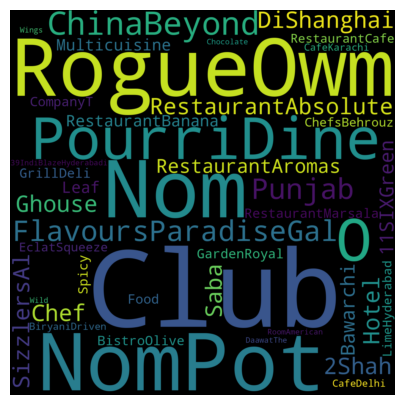

In [ ]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
from wordcloud import WordCloud # Import WordCloud class
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(15,5))
text="".join(name for name in meta_df_1.sort_values('Cost', ascending= False).Name[:30])
word_cloud = WordCloud(width=1400, height=1400, collocations=False, background_color='black').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

As a result of its concise representation of the terms that appear most frequently in the text data, it offers a clear, aesthetically pleasing method for understanding important themes or subjects within the dataset.

##### 2. What is/are the insight(s) found from the chart?

insights showing which words or phrases are most frequently used in capital letters to make things easier for fancy eateries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will improve comprehension of prevailing themes or issues and have a favourable impact on company.




#### Chart - 2

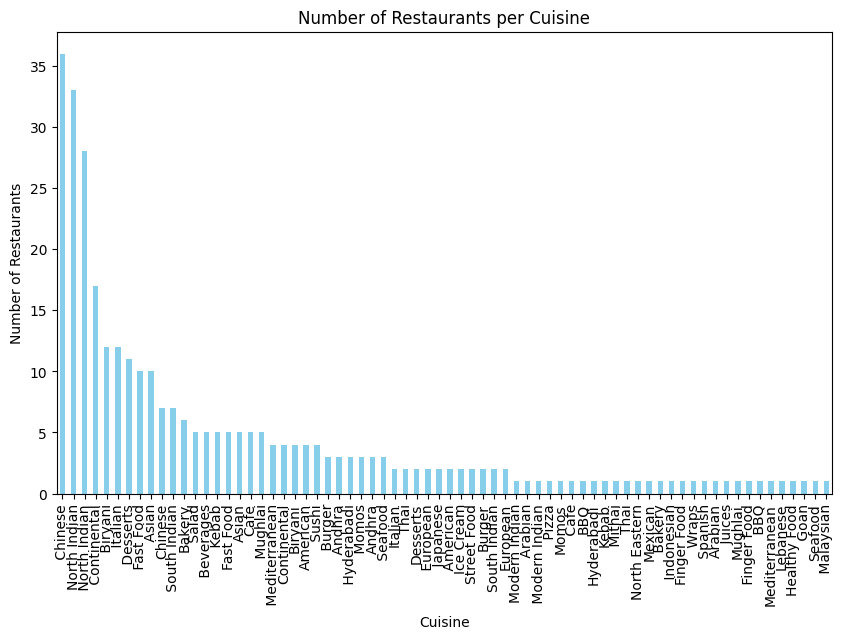

In [ ]:
# Chart - 2 visualization code
cuisine_counts = meta_df_1['Cuisines'].str.split(',', expand=True).stack().value_counts()
plt.figure(figsize=(10,6))
cuisine_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Restaurants per Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To Showcase the number of restaurants by cuisine.

##### 2. What is/are the insight(s) found from the chart?

Most restaurants are dominated by Chinese cuisine..

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Affect:
Makes a difference recognize prevalent cuisines for focused on promoting.

Negative Development:
Over-saturation of Chinese eateries may lead to strongly competition.

#### Chart - 3

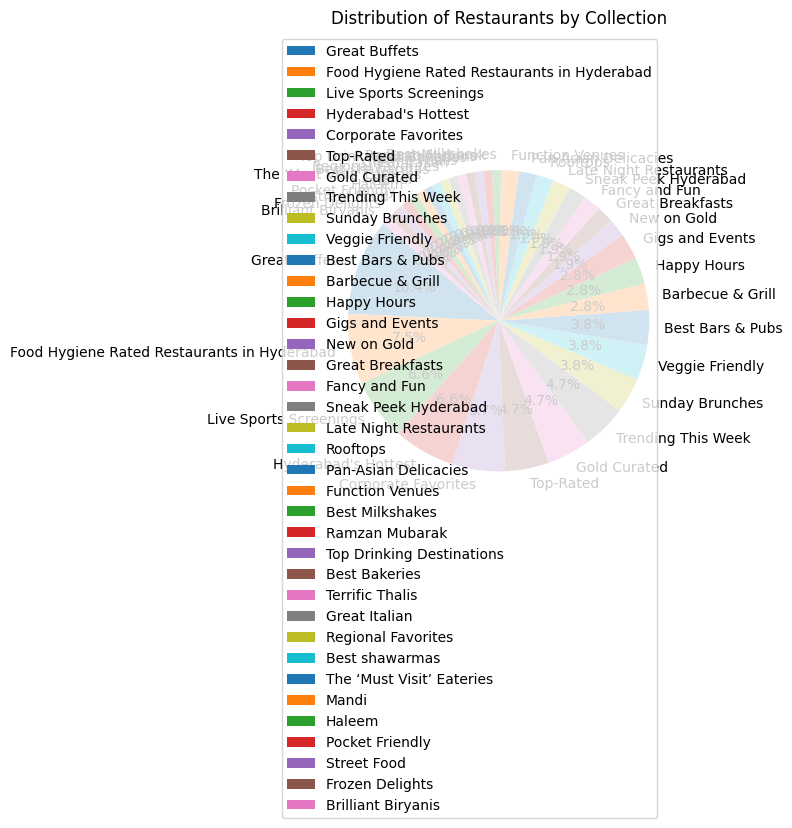

In [ ]:
# Chart 3 visualization code
collection_counts = meta_df_1['Collections'].str.split(', ', expand=True).stack().value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(collection_counts, labels=collection_counts.index, autopct='%1.1f%%', startangle=140)
plt.gca().set_aspect("equal")
plt.title('Distribution of Restaurants by Collection')
plt.axis('equal')
plt.legend(collection_counts.index, loc='best')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I picked the bar chart since it successfully visualizes the best 10 eateries by their fetched, permitting for simple comparison.



##### 2. What is/are the insight(s) found from the chart?

The knowledge from the chart is that these beat 10 eateries have the most elevated taken a toll among all eateries, which may show their upscale nature or premium offerings.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

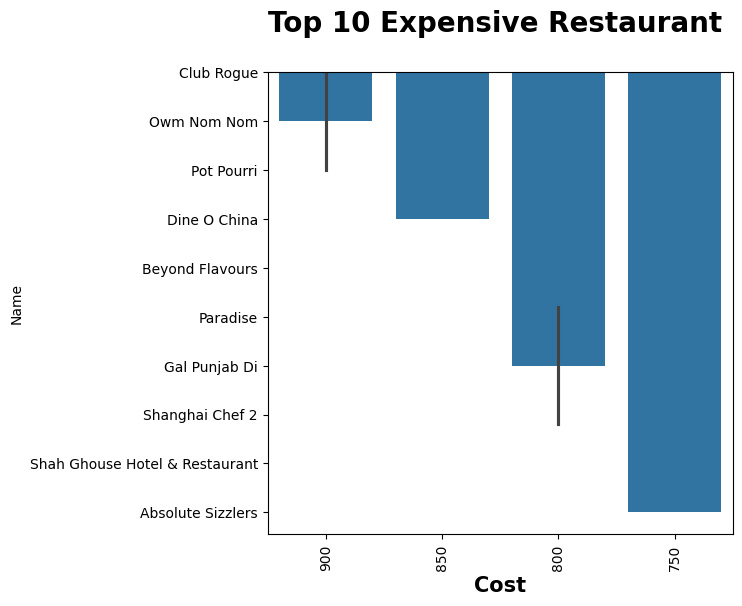

In [ ]:
# Chart - 4 visualization code
# Top 10 Expensive Restaurants
plt.figure(figsize=(6,6))
x = Top_10_Expensive_Restaurant['Cost']
y = Top_10_Expensive_Restaurant['Name']
plt.title("Top 10 Expensive Restaurant \n",fontsize=20,weight='bold')
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.ylabel("Resaturant",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

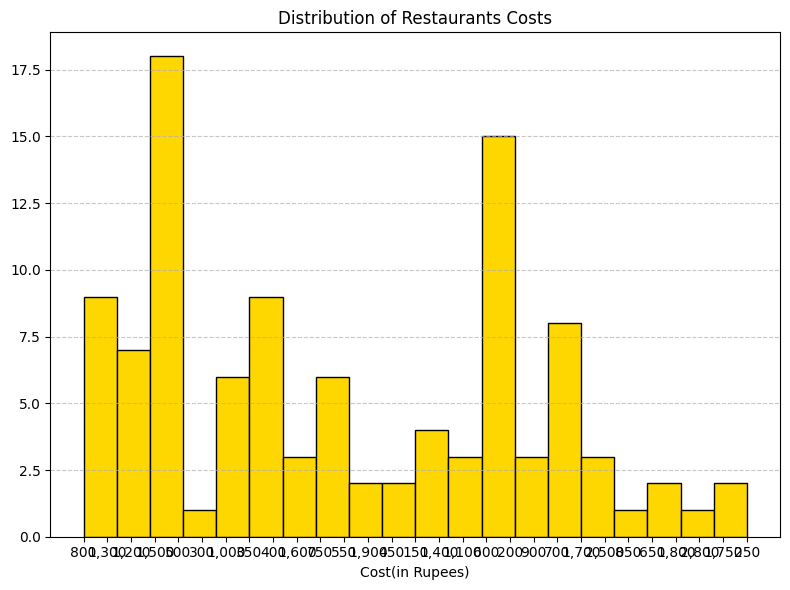

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8,6))
plt.hist(meta_df_1['Cost'], bins=20, color='gold', edgecolor='black')
plt.title('Distribution of Restaurants Costs')
plt.xlabel('Cost(in Rupees)')
plt.ylabel=('Frequency')
plt.grid(axis='y',  linestyle='--', alpha =0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

TypeError: 'str' object is not callable

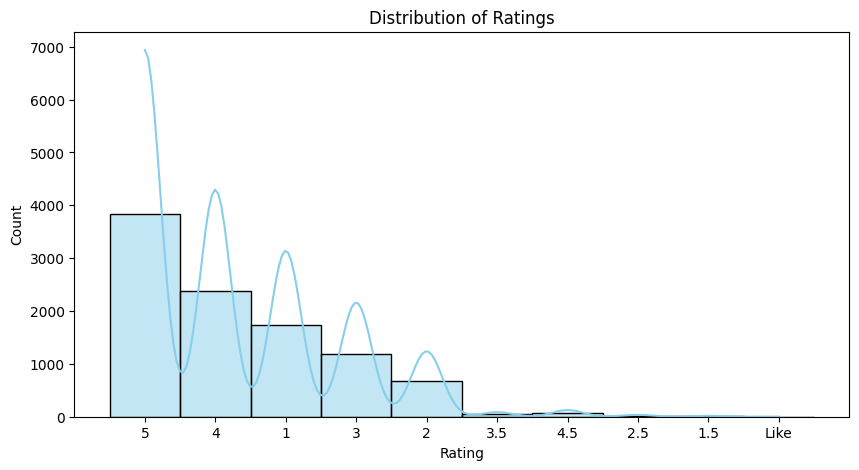

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
sns.histplot(review_df_2['Rating'], bins =10, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [53]:
if 'Year' in merged_df.columns:
  print("'Year' column found")

else:
    # Column does not exist, handle the error
    print("Error: 'Year' column not found in merged_df DataFrame")

Error: 'Year' column not found in merged_df DataFrame


KeyError: 'Year'

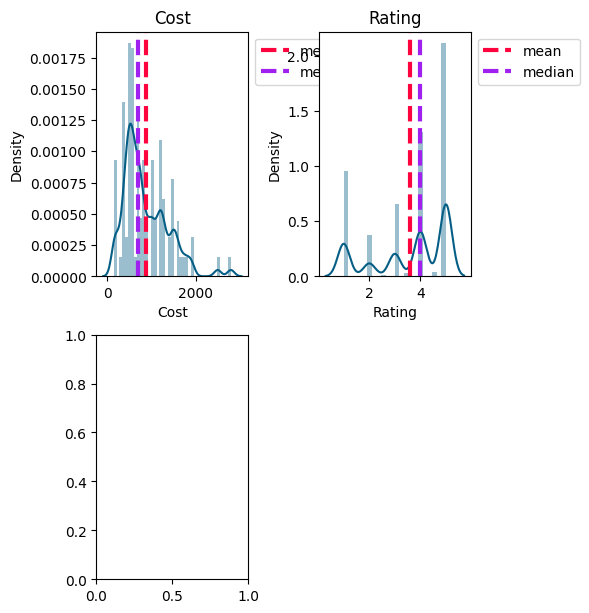

In [57]:
# Chart - 7 visualization code
plt.figure(figsize = (6,6));
for i,col in enumerate(['Cost','Rating','Year']) :
    plt.subplot(2,2,i+1);
    sns.distplot(merged_df[col], color = '#055E85');
    feature = merged_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

TypeError: 'str' object is not callable

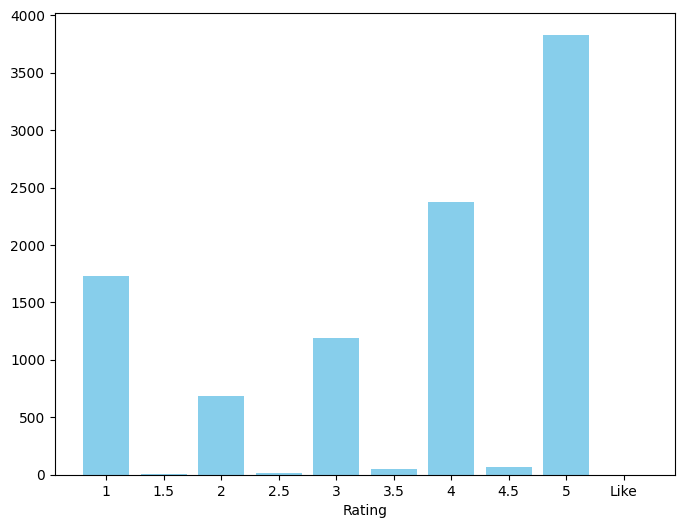

In [ ]:
# Chart - 8 visualization code
rating_counts = review_df_2['Rating'].value_counts().sort_index()

#Bar Chart
plt.figure(figsize=(8,6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.xticks(rating_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

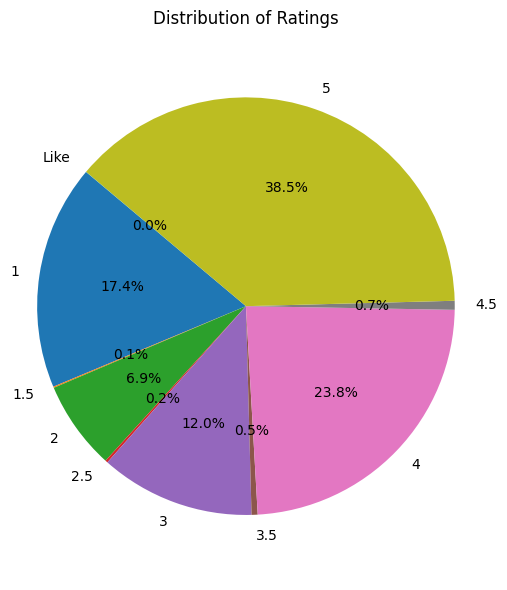

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(5,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

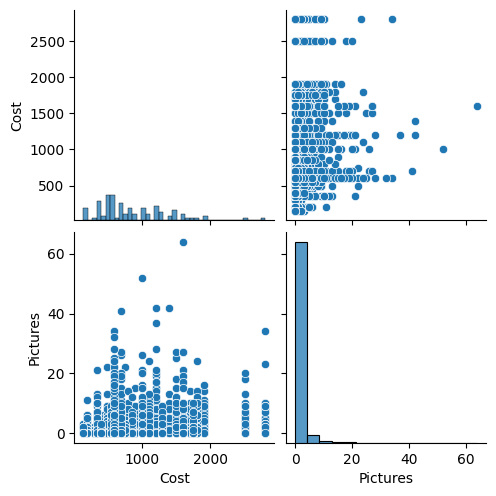

In [ ]:
# Chart - 10 visualization code
sns.pairplot(merged_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

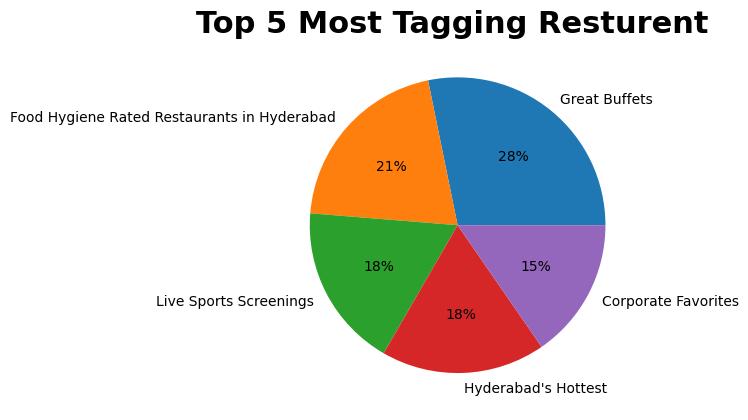

In [42]:
# Chart - 11 visualization code
collection_list = Collections_df.sort_values('Number_of_Restaurants', ascending = False)['Tags'].tolist()[:5]
data = Collections_df.sort_values('Number_of_Restaurants', ascending = False) ['Number_of_Restaurants'].tolist()[:5]
labels = collection_list


#create pie chart
plt.pie(data, labels = labels,  autopct='%.0f%%')
plt.title('Top 5 Most Tagging Resturent ', size =22, weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

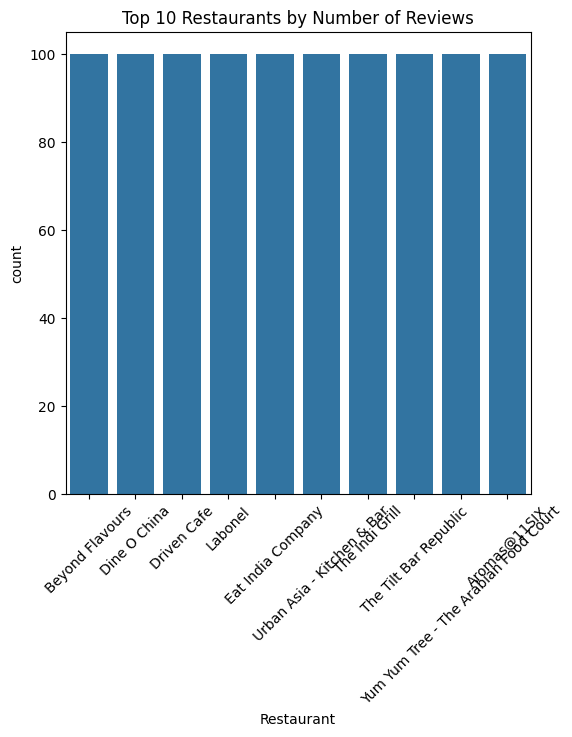

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(6, 6))
sns.countplot(x='Restaurant', data=review_df_2, order=review_df_2['Restaurant'].value_counts().index[:10])
plt.title('Top 10 Restaurants by Number of Reviews')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)

Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)

Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf

# Convert the 'Rating' column to numeric
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'])

# Fit the linear model
model = smf.ols(formula='merged_df["Rating"] ~ merged_df["Cost"]', data=merged_df).fit()

# Get the p-value
p_value = model.pvalues[1]

# Interpret the results
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***